# Reducing Commercial Aviation Fatalities

### EDA for the competition Aviation Fatalities on Kaggle

In [3]:
# Imports for data manipulation and data vizualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')
scaler = MinMaxScaler()

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")



In [24]:
train.head(5)
test.head(5)

,id,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,...,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
0,0,1,LOFT,0.000000,0,17.899500,6.127830,0.994807,-28.206200,-47.695499,...,-7.044480,-14.405100,-4.03384,-0.393799,31.83810,17.075600,-8.137350,-7323.120117,643.177002,594.778992
1,1,1,LOFT,0.000000,1,45.883202,94.749001,23.290800,1.392000,2.060940,...,19.887501,-215.179001,2.11832,7.340940,9.66785,1169.239990,-0.024414,-3335.080078,826.724976,136.235001
2,2,1,LOFT,0.003906,0,33.120098,28.356501,-7.239220,-7.690860,-25.833799,...,-7.642560,-10.363600,10.95050,6.513360,36.01860,24.356600,0.956158,-7323.120117,643.177002,594.778992
3,3,1,LOFT,0.003906,1,43.280102,95.887001,18.702299,-1.432890,-4.232600,...,13.826600,-214.223007,-4.91354,3.504520,3.87811,1159.400024,-0.047607,-3335.080078,826.724976,136.235001
4,4,1,LOFT,0.007812,0,7.929110,3.460380,-10.860800,-26.366699,-25.894699,...,2.045450,-20.788799,-3.61418,-7.539830,3.08397,13.647900,1.473720,-7323.120117,643.177002,594.778992


In [28]:
#Scaling the data
trainN = train.loc[:, train.dtypes == np.float64]
trainN['seat'] = train.seat
trainN['crew'] = train.crew
trainN[:] = scaler.fit_transform(trainN[:])
trainN['experiment'] = train['experiment'].map({'CA': -1, 'DA': 0,'SS':1})


testN = test.loc[:, test.dtypes == np.float64]
testN['seat'] = test.seat
testN['crew'] = test.crew
testN[:] = scaler.fit_transform(testN[:])


#### Let's see how features are distributed by class

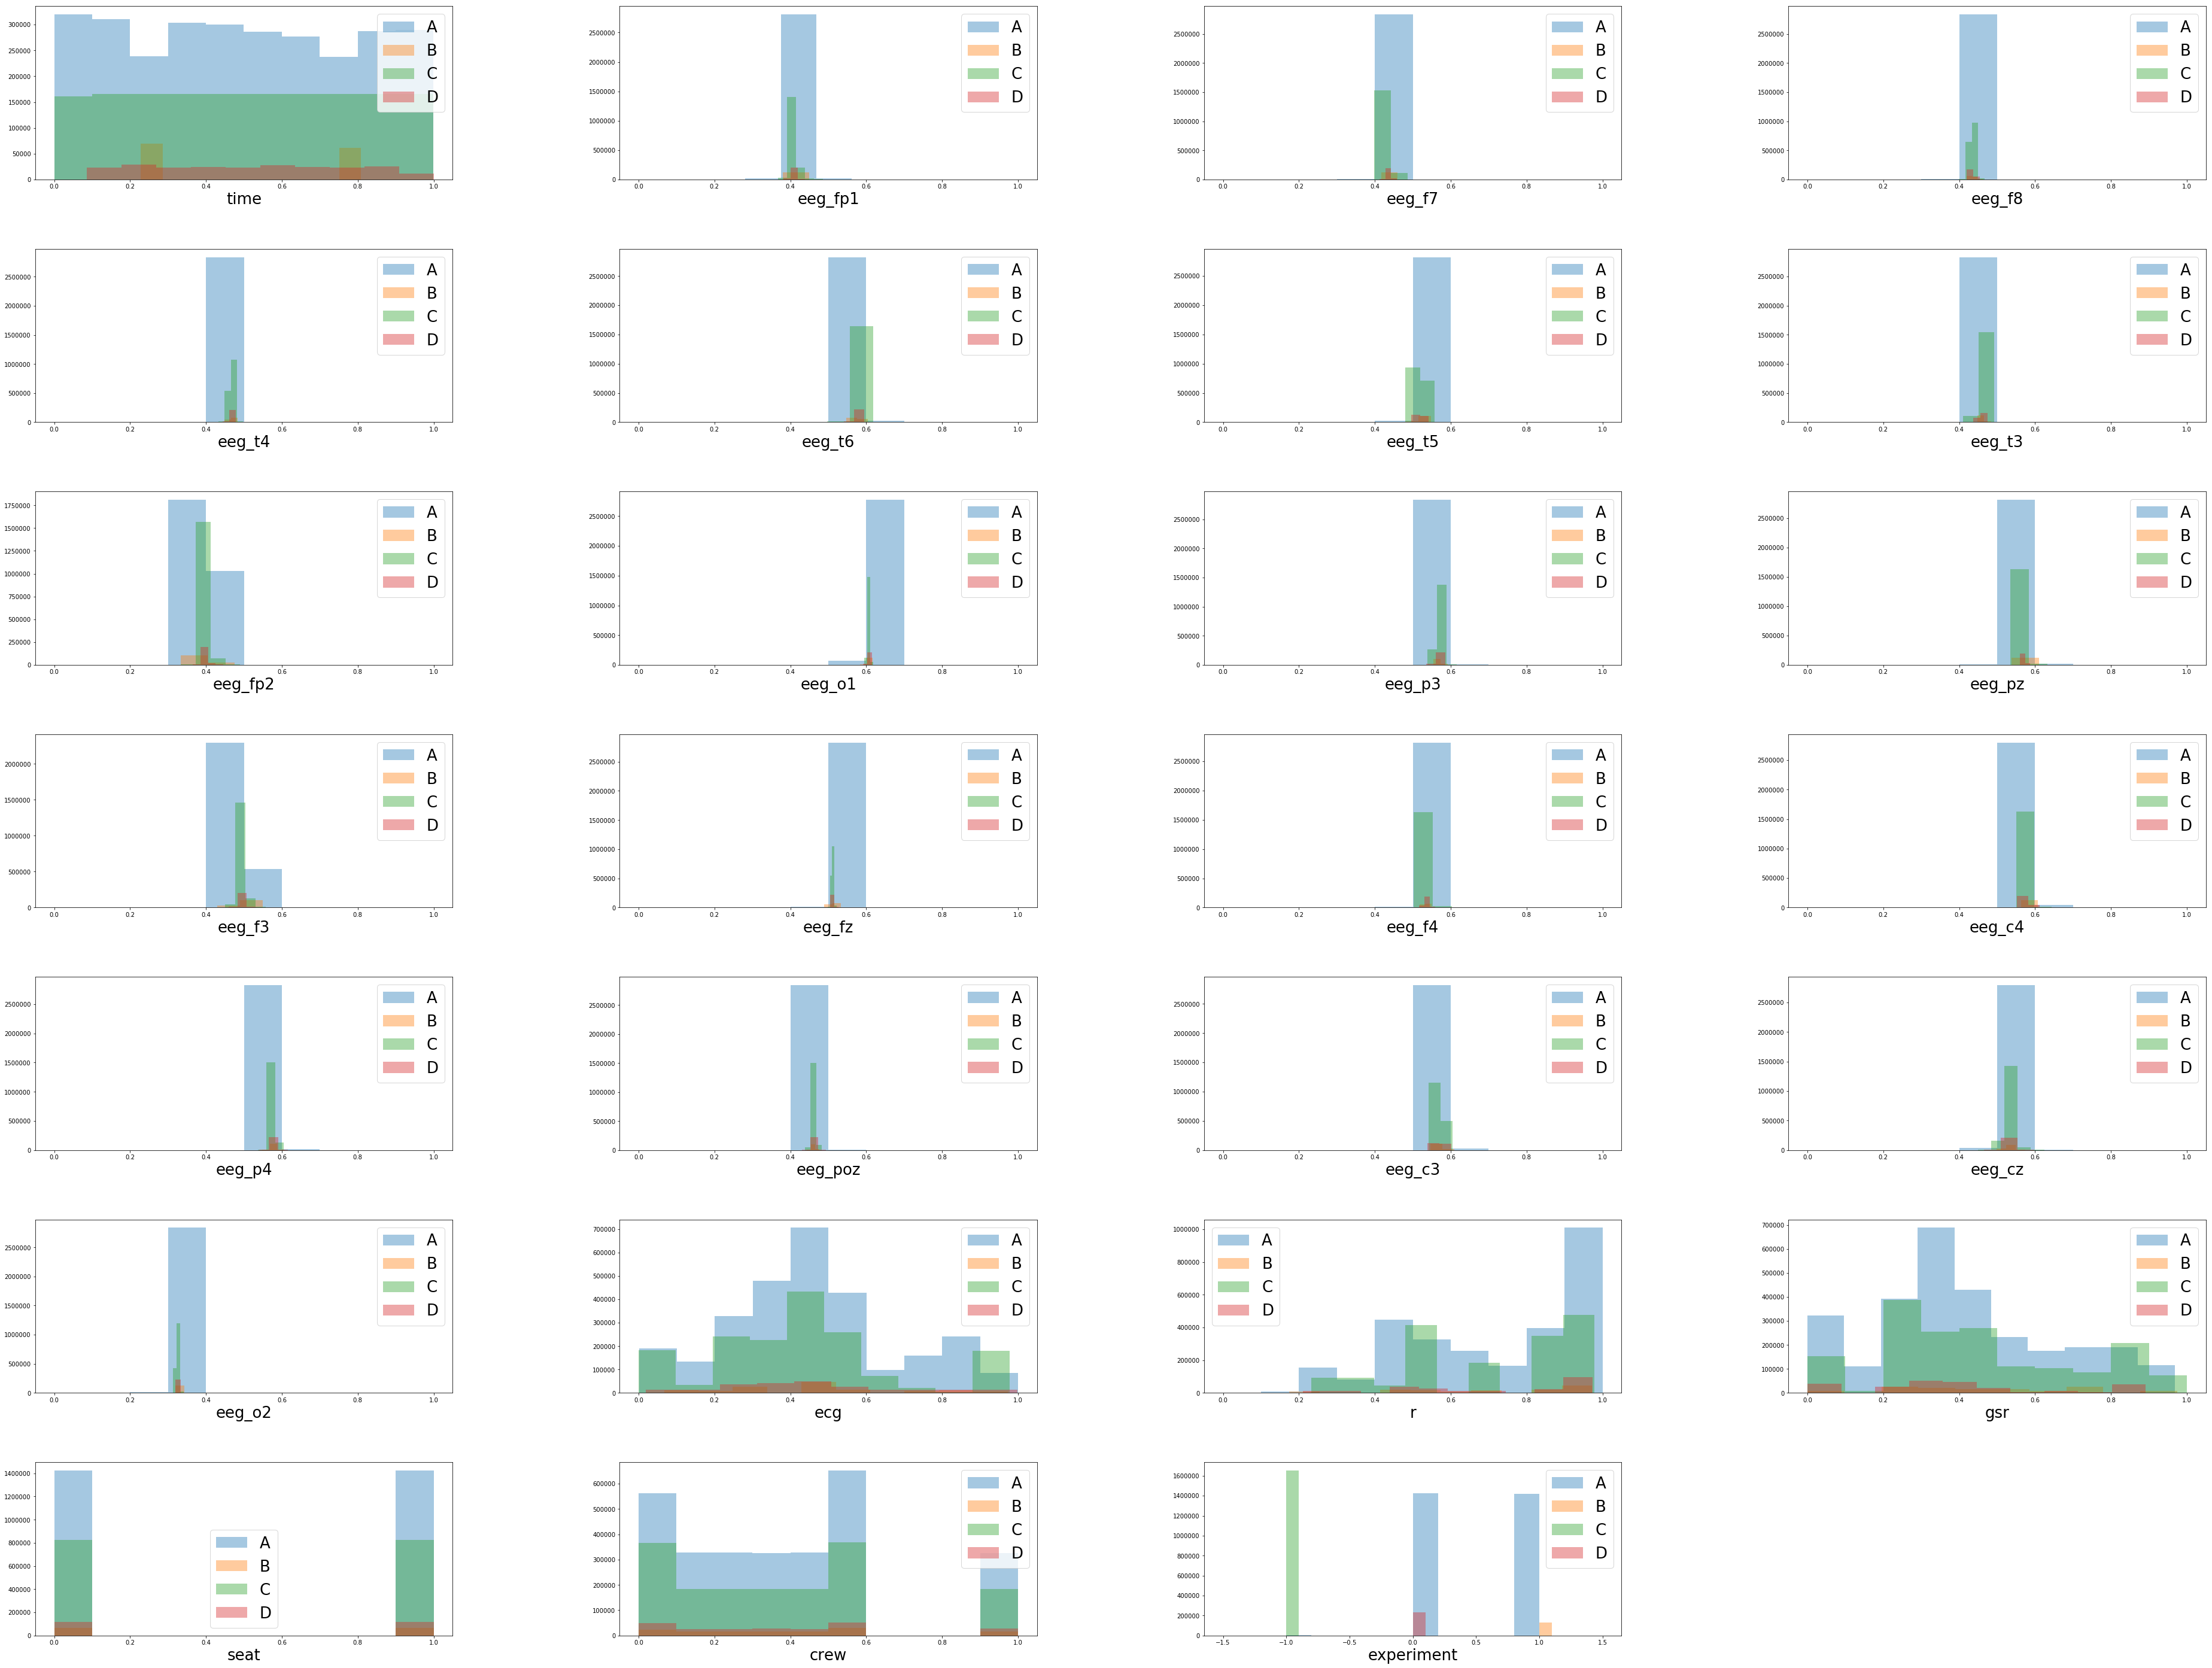

In [9]:
trainA = trainN[train.event=='A']
trainB = trainN[train.event=='B']
trainC = trainN[train.event=='C']
trainD = trainN[train.event=='D']

fig = plt.figure(figsize=(65,65))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.grid()

for row,i in zip(trainN,range(0,len(trainN.columns))):
    
    plt.subplot(len(trainN.columns)/3, 4, i+1)
    plt.hist(trainA[row],label='A',alpha=0.4)
    plt.hist(trainB[row],label='B',alpha=0.4)
    plt.hist(trainC[row],label='C',alpha=0.4)
    plt.hist(trainD[row],label='D',alpha=0.4)
    plt.xlabel(row,size=26)
    plt.legend(fontsize=26)



#### In this plot we can see that some features represents more embracing values,in this way, we also can notice that a lot of represents values with low variance. As this plot was divided by classes, in this group of histograms we can observe that some features could be useless 

#### Now lets see how are the correlation of the features 

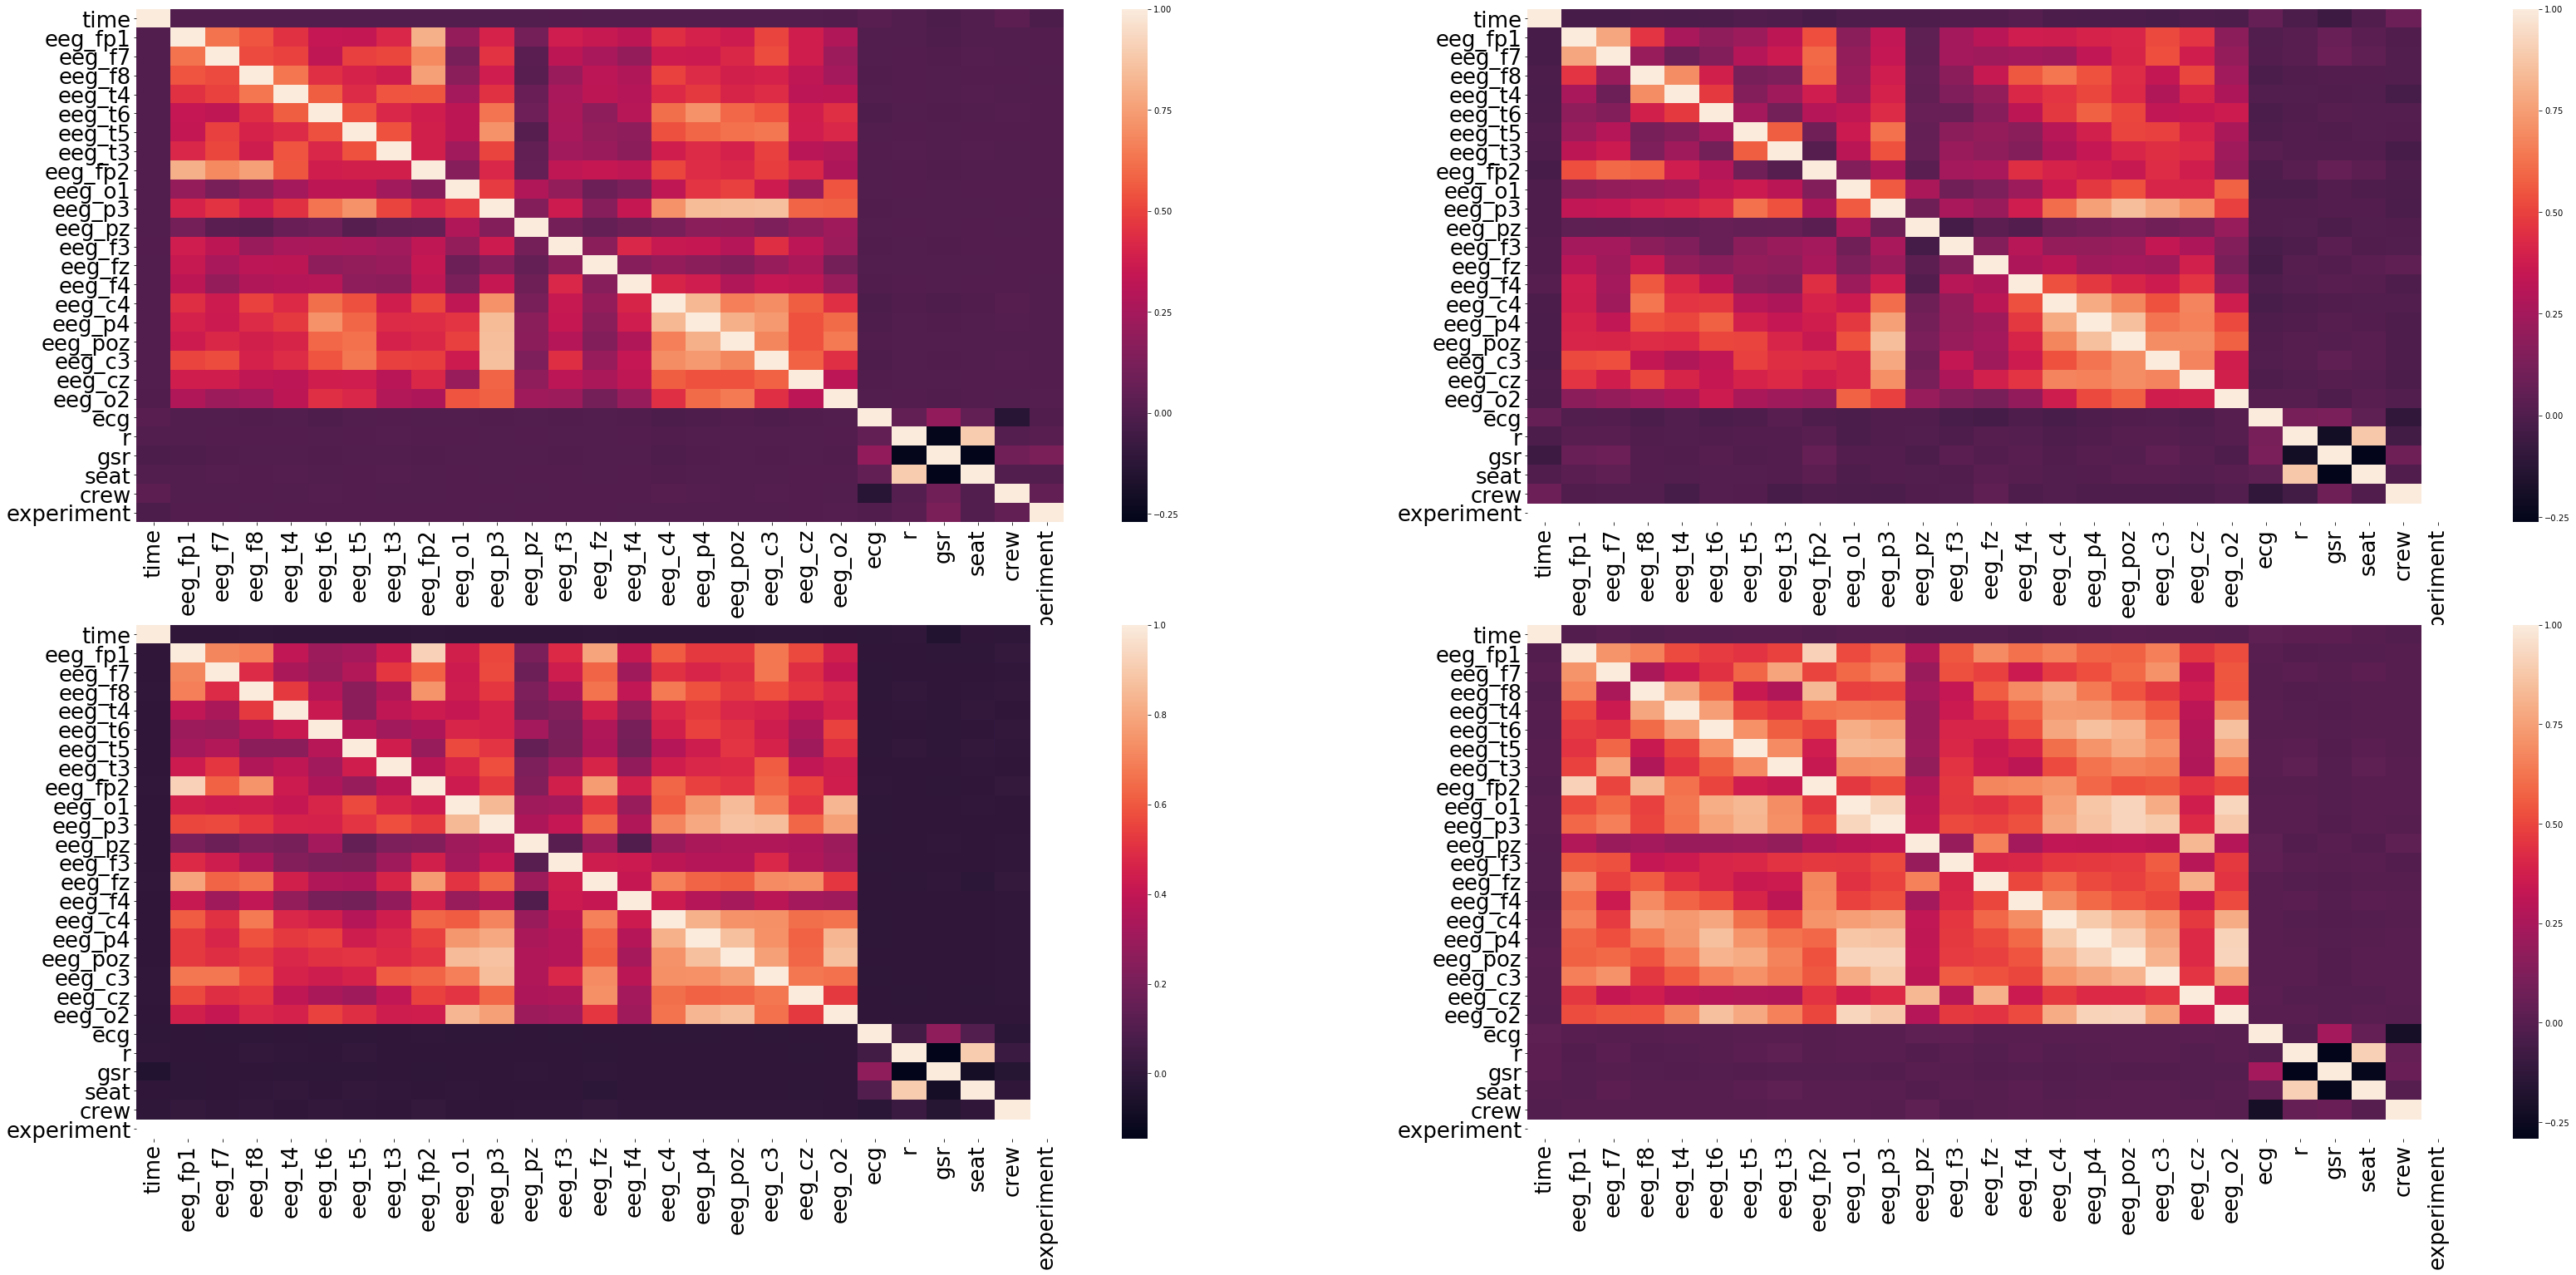

In [13]:
fig = plt.figure(figsize=(55,25))
#fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplot(2, 2, 1)
corr = trainA.corr()

a = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.tick_params(axis='y', which='major', labelsize=26)
plt.tick_params(axis='x', labelrotation = 90,which='major', labelsize=26)

plt.subplot(2, 2, 2)
corr = trainB.corr()
b = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.tick_params(axis='y', which='major', labelsize=26)
plt.tick_params(axis='x', labelrotation = 90,which='major', labelsize=26)
plt.subplot(2, 2, 3)
corr = trainC.corr()
c = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.tick_params(axis='y', which='major', labelsize=26)
plt.tick_params(axis='x', labelrotation = 90,which='major', labelsize=26)
plt.subplot(2, 2, 4)
corr = trainD.corr()
d = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.tick_params(axis='y', which='major', labelsize=26)
plt.tick_params(axis='x', labelrotation = 90,which='major', labelsize=26)
 


#### lets see now how every crew features are distributed 

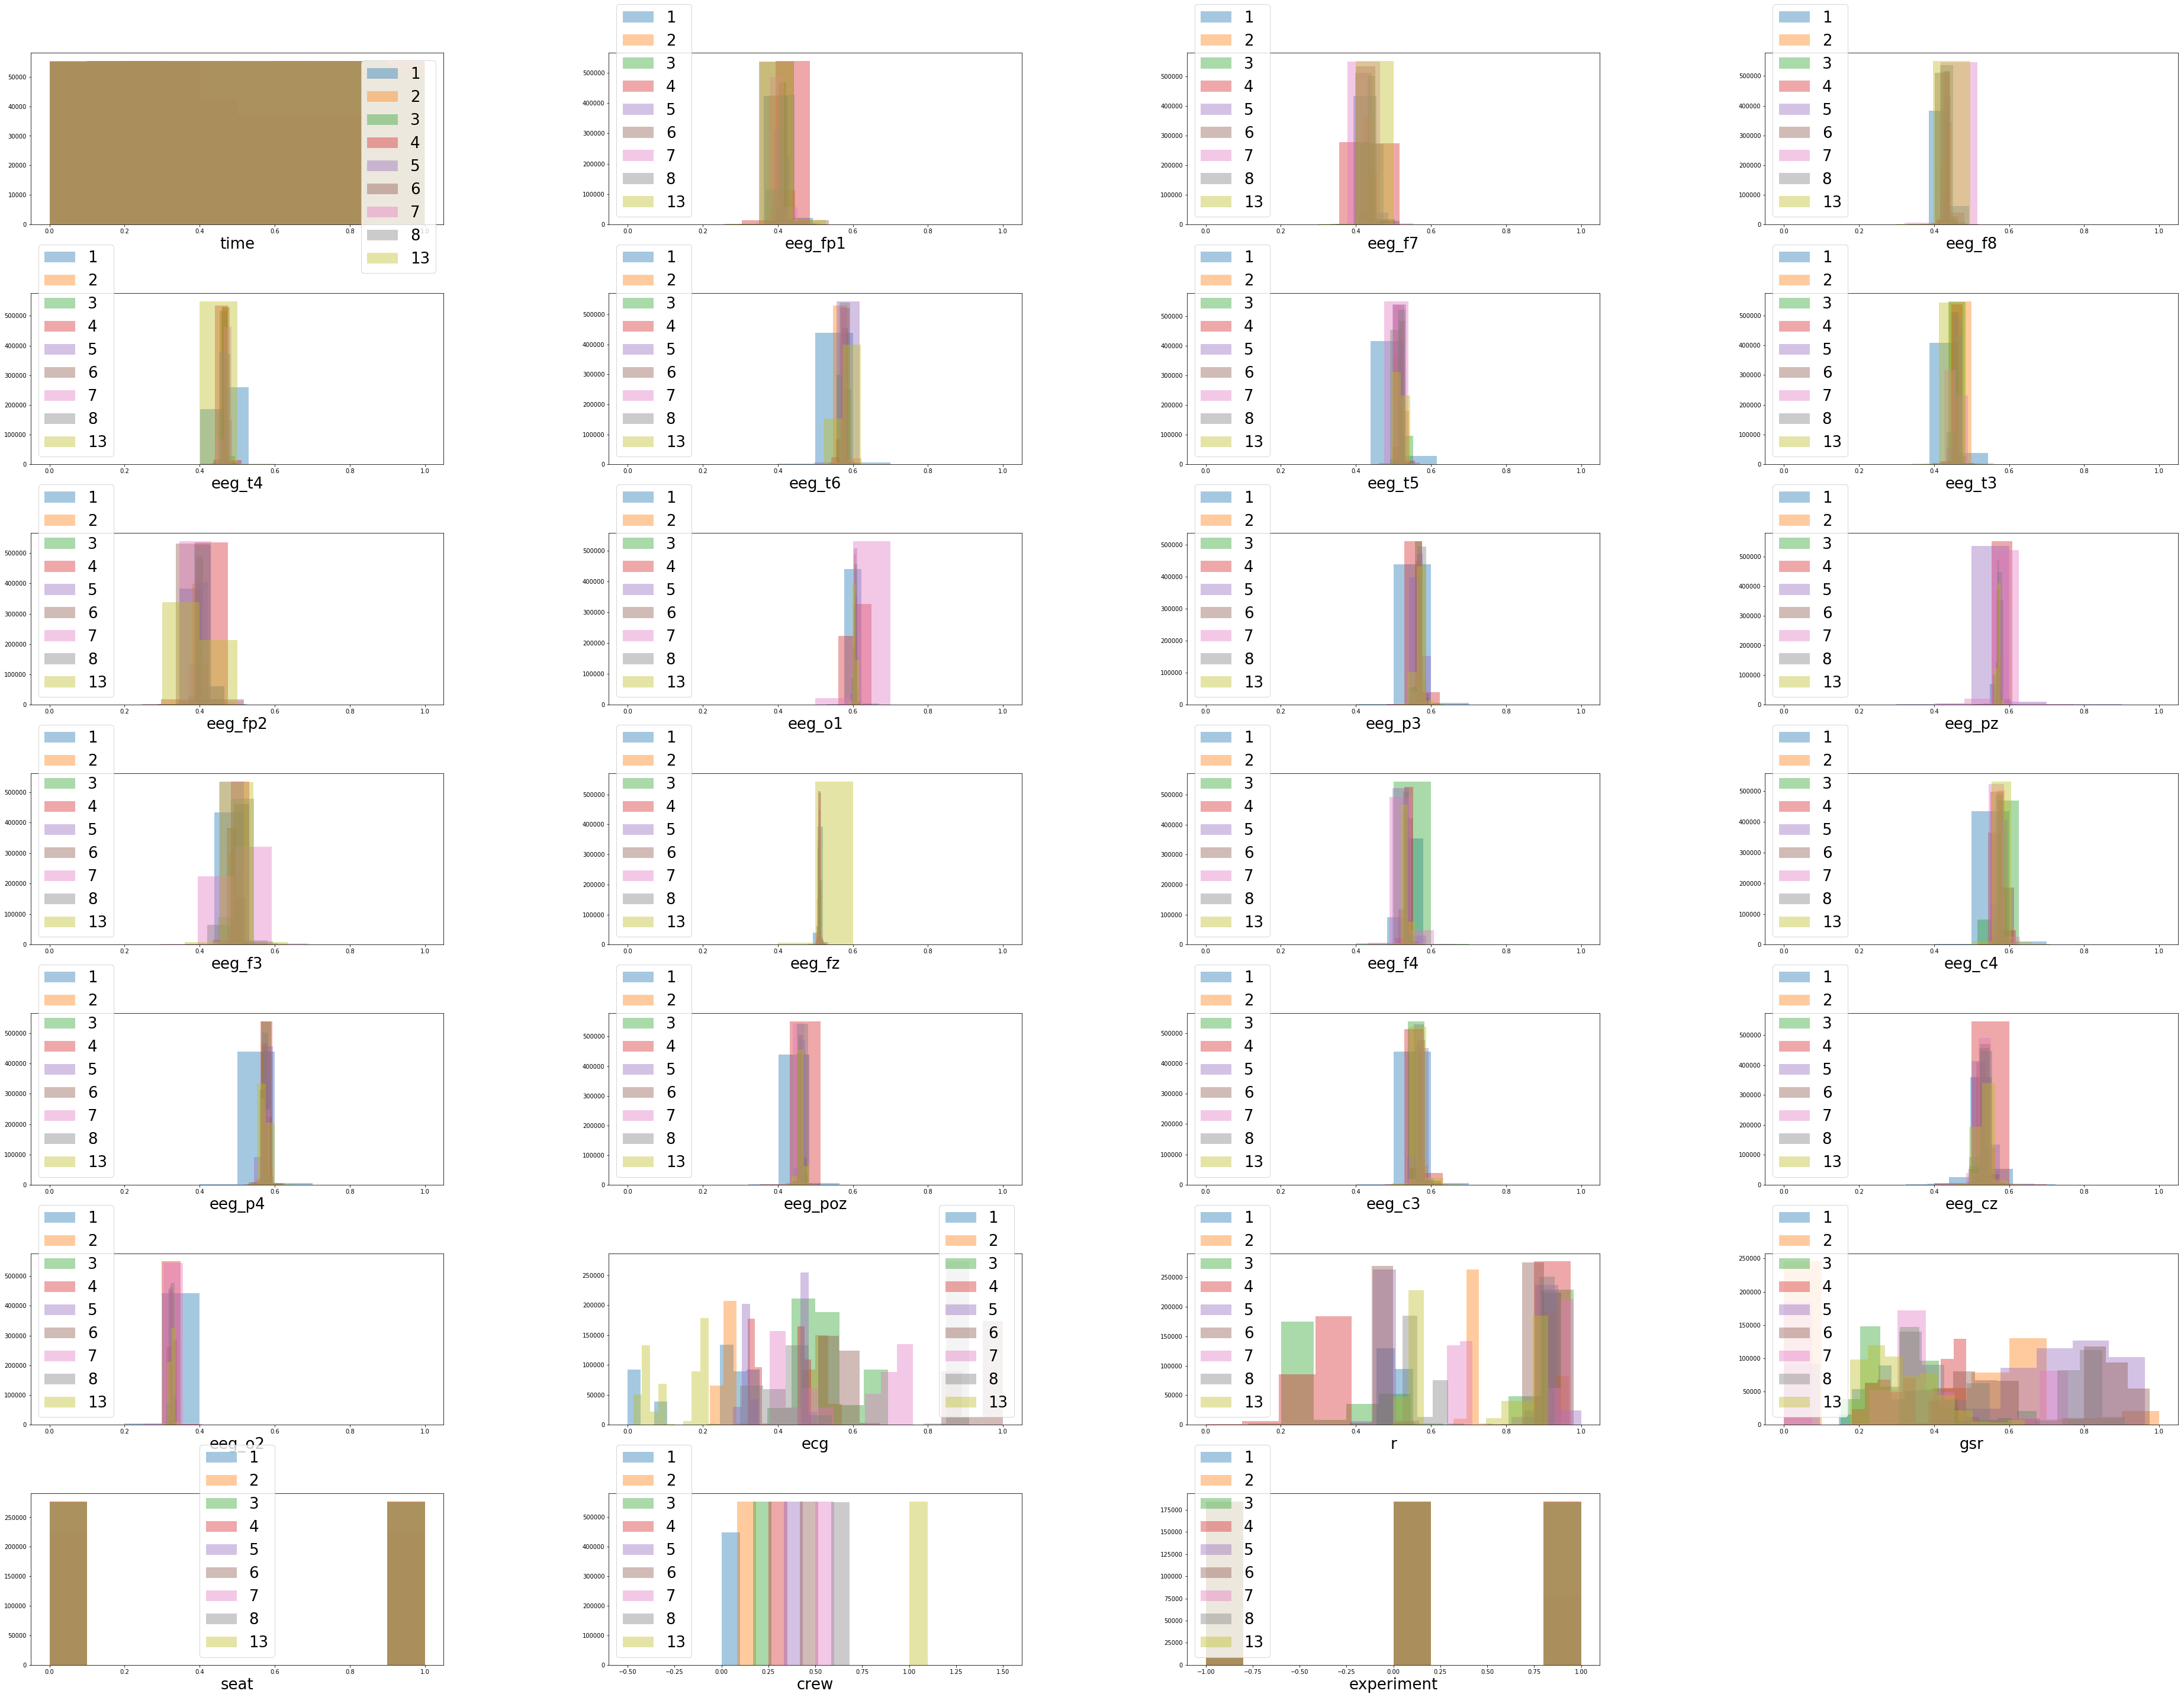

In [5]:
crews = np.unique(train.crew)
grCrews = []
for c in crews:
    grCrews.append(trainN[train.crew==c])
fig = plt.figure(figsize=(65,65))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.grid()
for row,i in zip(trainN,range(0,len(trainN.columns))):
    
    plt.subplot(len(trainN.columns)/3, 4, i+1)
    for gr,l in zip(grCrews,np.unique(train.crew)):
        plt.hist(gr[row].values,label=str(l),alpha=0.4)
    plt.xlabel(row,size=26)
    plt.legend(fontsize=26)


#### it seems like every crew have your on characteristics, special in the features more relevant, by variance, showed in the first histogram

#### lets see now the most important features by variance found by PCA technique

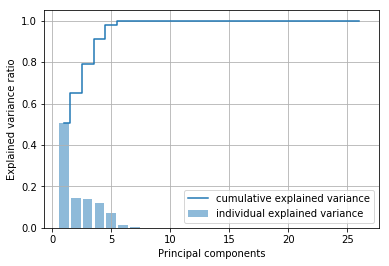

In [31]:
cov_mat = np.cov(trainN.values.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,len(trainN.columns)+1), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,len(trainN.columns)+1), cum_var_exp, where='mid',label='cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.grid()
plt.show()

#### only with 5\4 features with explained more than 90% of the data!!!
#### lets see how data looks like in 2D dimension

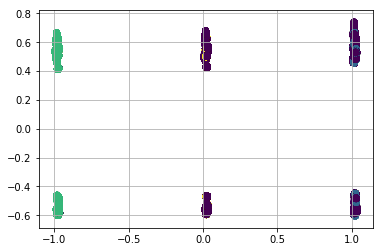

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
space2D = pca.fit_transform(trainN.values)
labels = train.event.map({"A":0,"B":1,"C":2,"D":3}).values
plt.scatter(space2D[:,0],space2D[:,1],c=labels)
plt.grid()

#### Now lets see if the data in test set seems like that train data , thereby, we can see if  the distribution in train data sounds equal to test data.

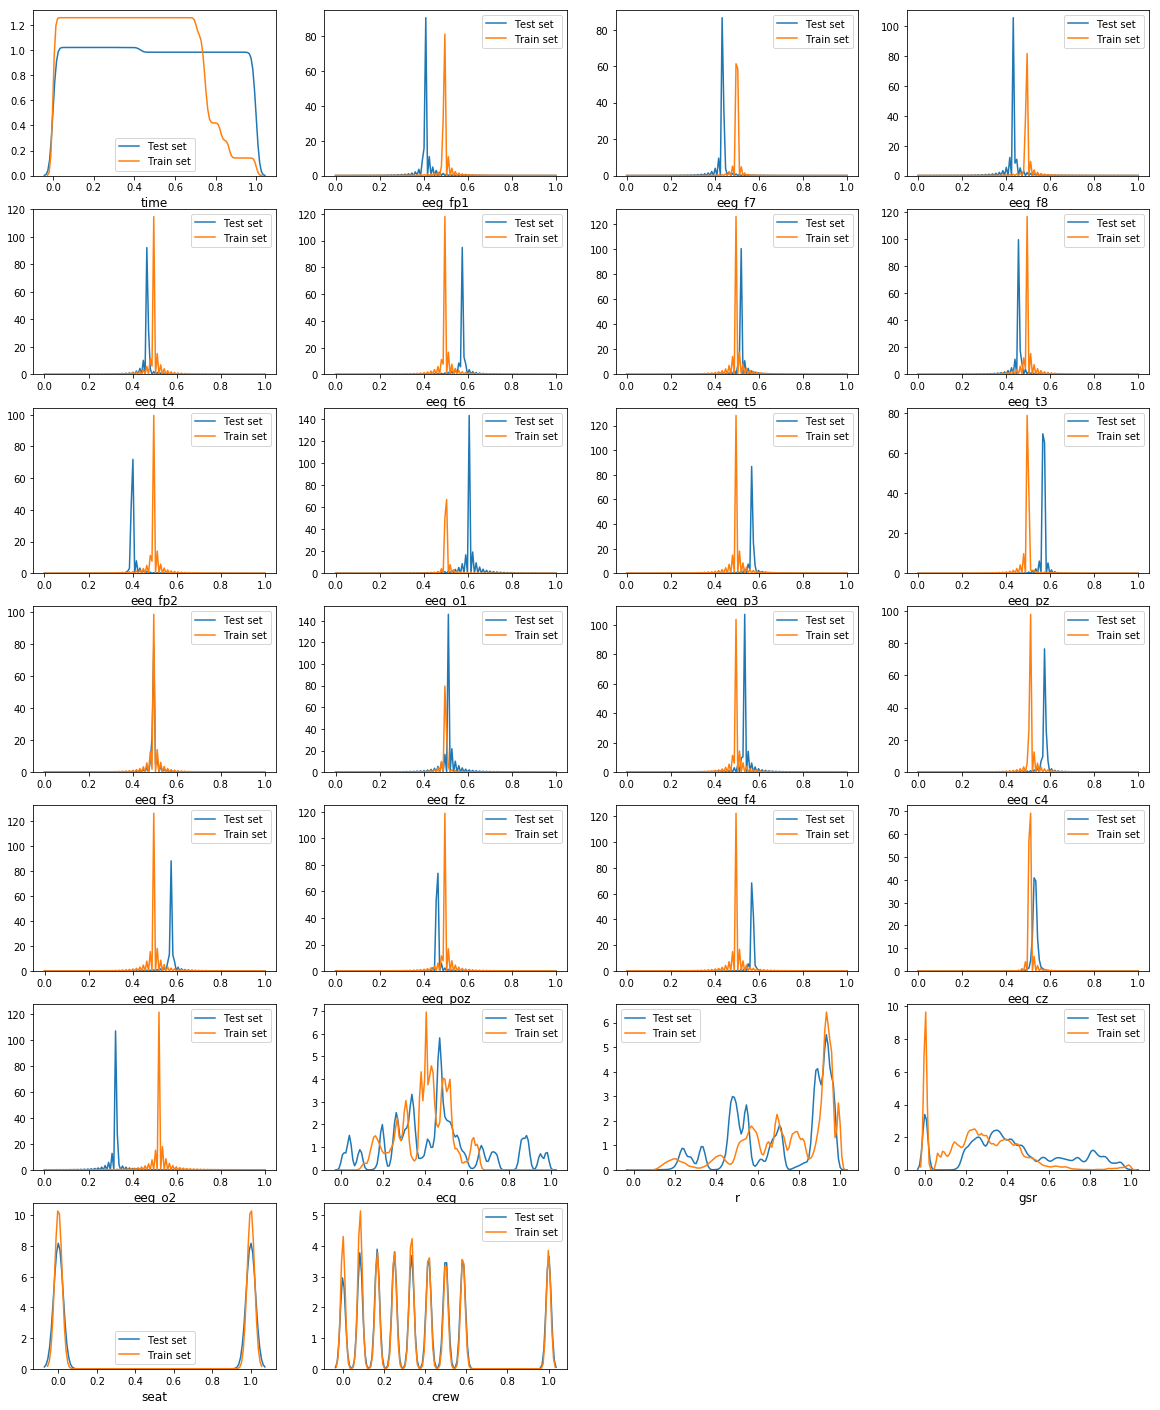

In [37]:
plt.figure(figsize=(20,25))
plt.title('Eeg features distributions')
i = 0
eeg_features  = testN.columns
for eeg in eeg_features:
    i += 1
    plt.subplot(len(testN.columns)/4+1, 4, i)
    sns.distplot(trainN[eeg], label='Test set', hist=False)
    sns.distplot(testN[eeg], label='Train set', hist=False)
    #plt.xlim((-500, 500))
    plt.legend()
    plt.xlabel(eeg, fontsize=12)

plt.show()

#### Looks like ok! In this way, we can conclude that cluster analysis could be a good solution for this problem

In [3]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,ExtraTreesClassifier,\
GradientBoostingRegressor, AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
import lightgbm as lgb
import numpy as np
import scipy as sp
import csv
import os

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)

train = np.load("train5F.npy")
labels = np.load("labels.npy")
#test = np.load("test5F.npy")

train = poly.fit_transform(train)
#test = poly.fit_transform(test)

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.2.2 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


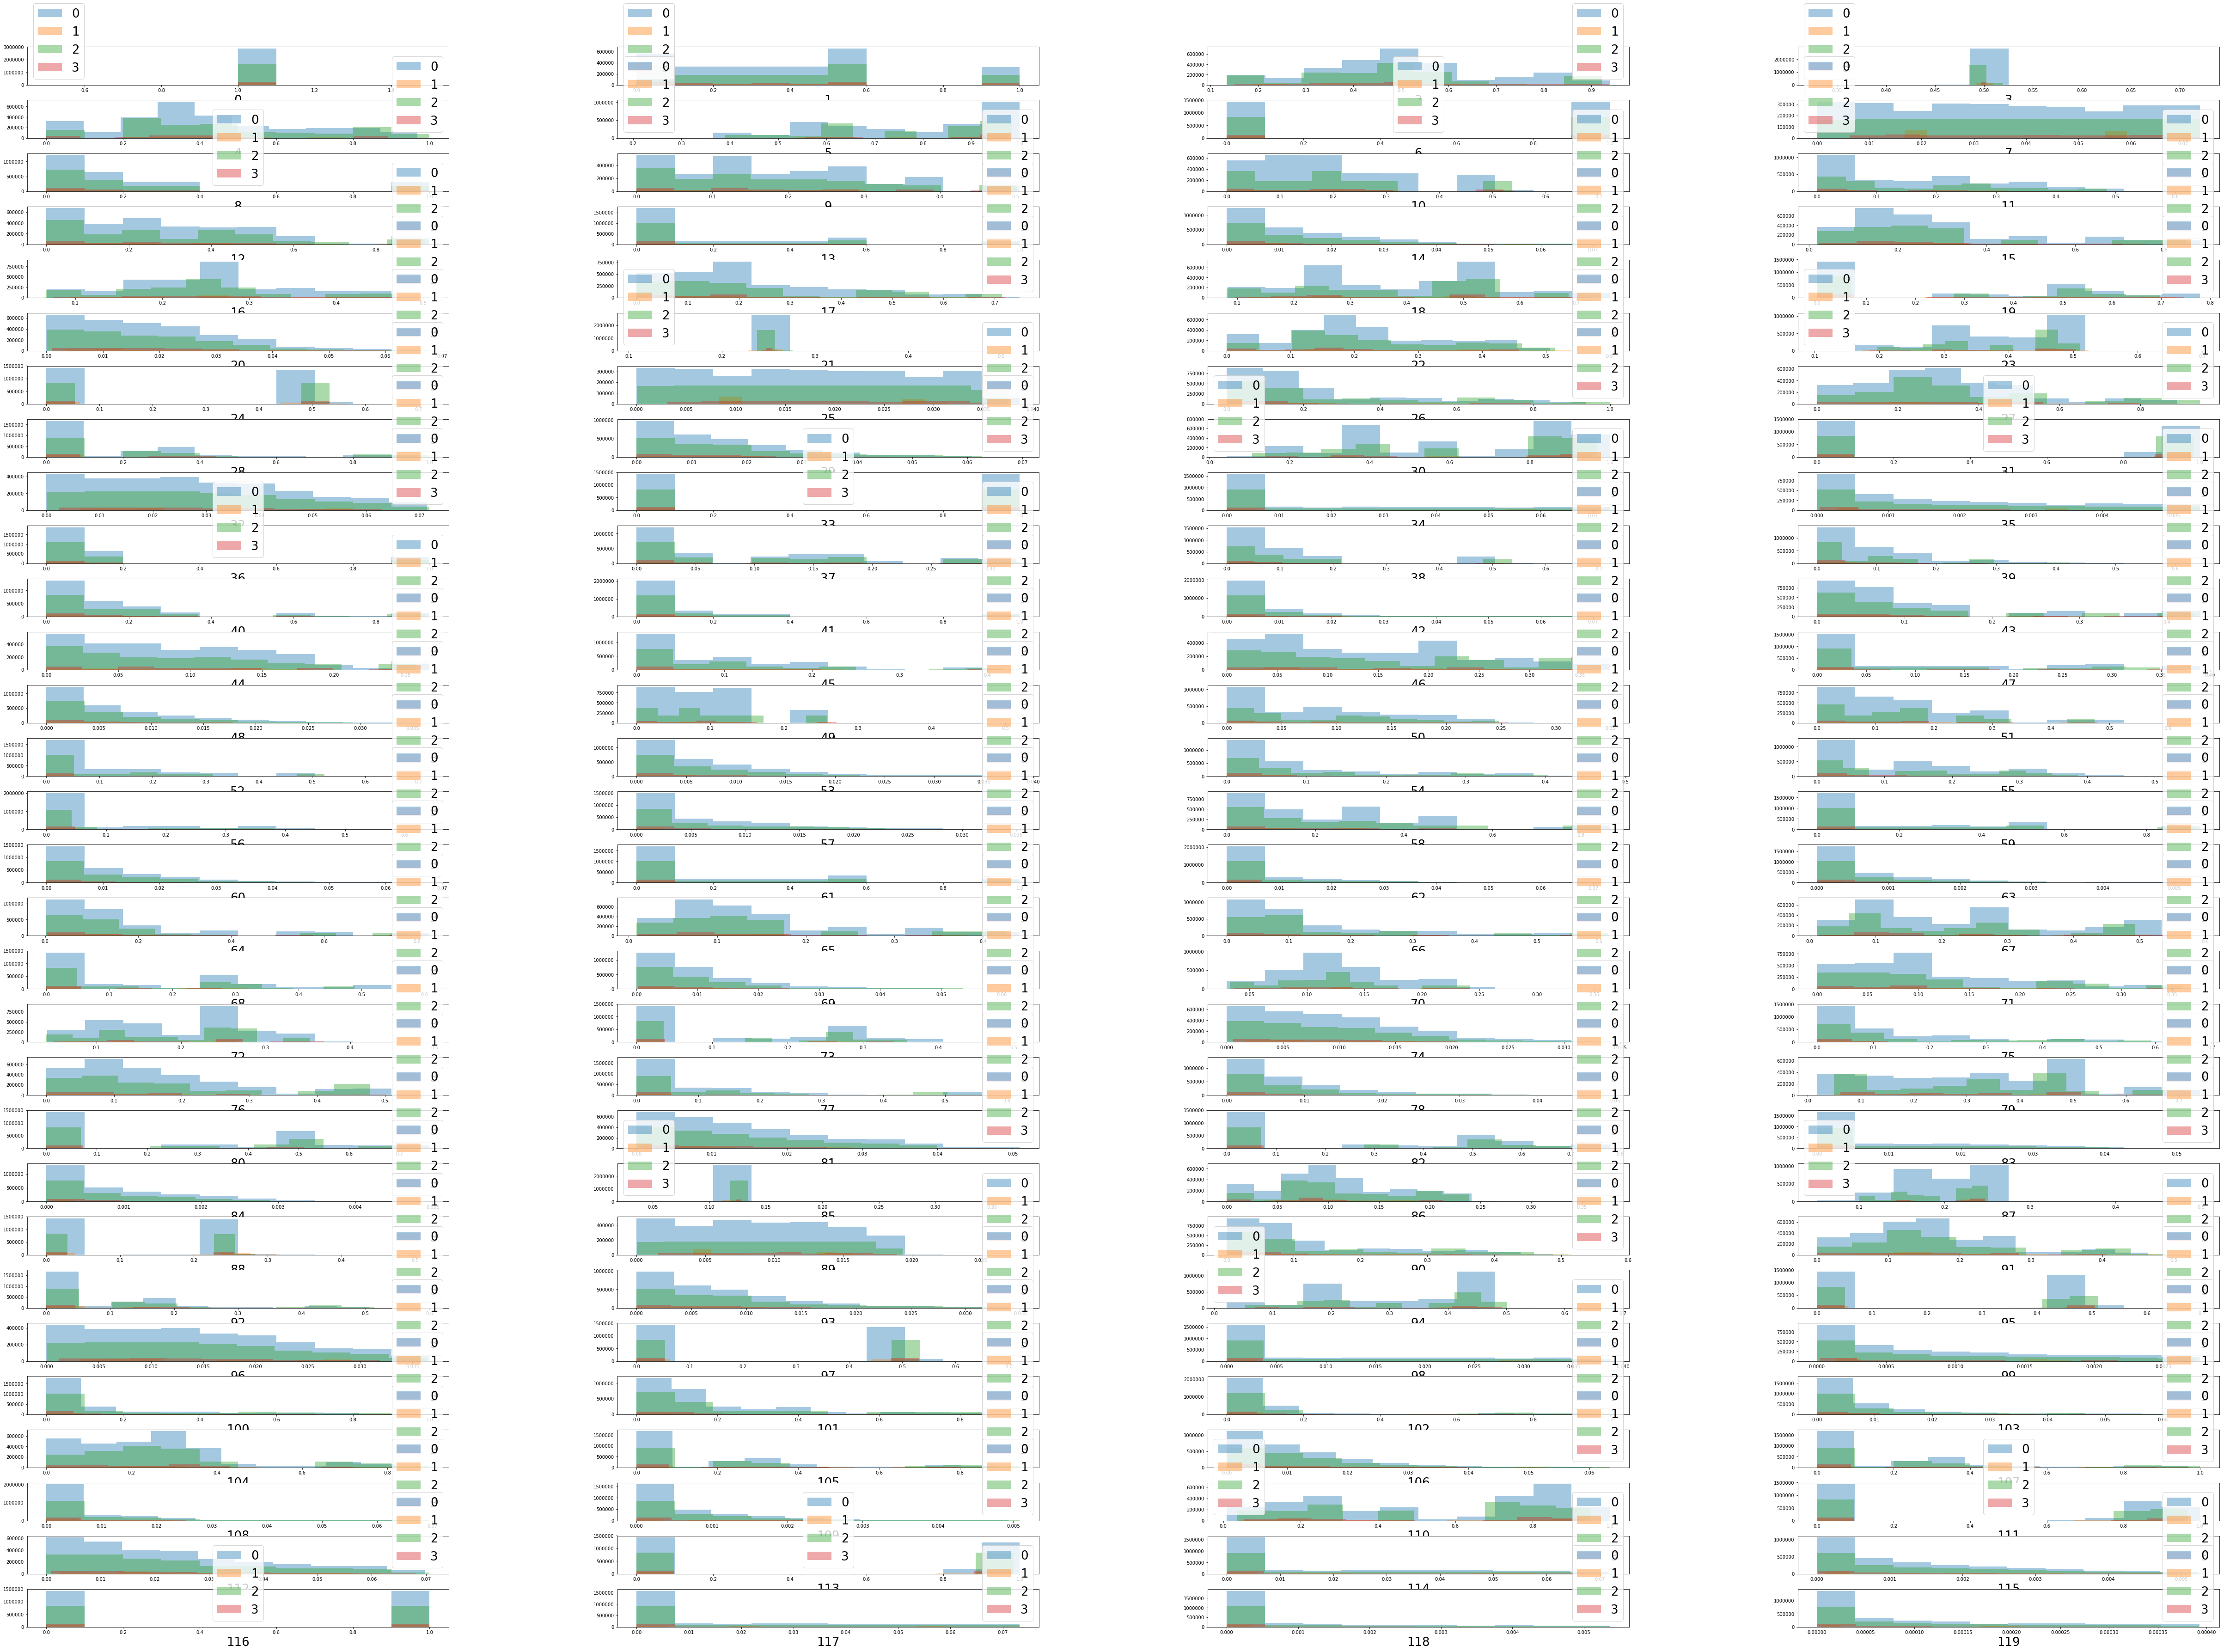

In [13]:
fig = plt.figure(figsize=(85,65))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.grid()
i = 0
for column in range(0,len(train[0])):
    
    plt.subplot(len(train[0])/4+1, 4, i+1)
    for u in np.unique(labels):
        plt.hist(train[:,column][labels==u],label=str(u),alpha=0.4)
    i+=1
    plt.xlabel(str(column),size=26)
    plt.legend(fontsize=26)

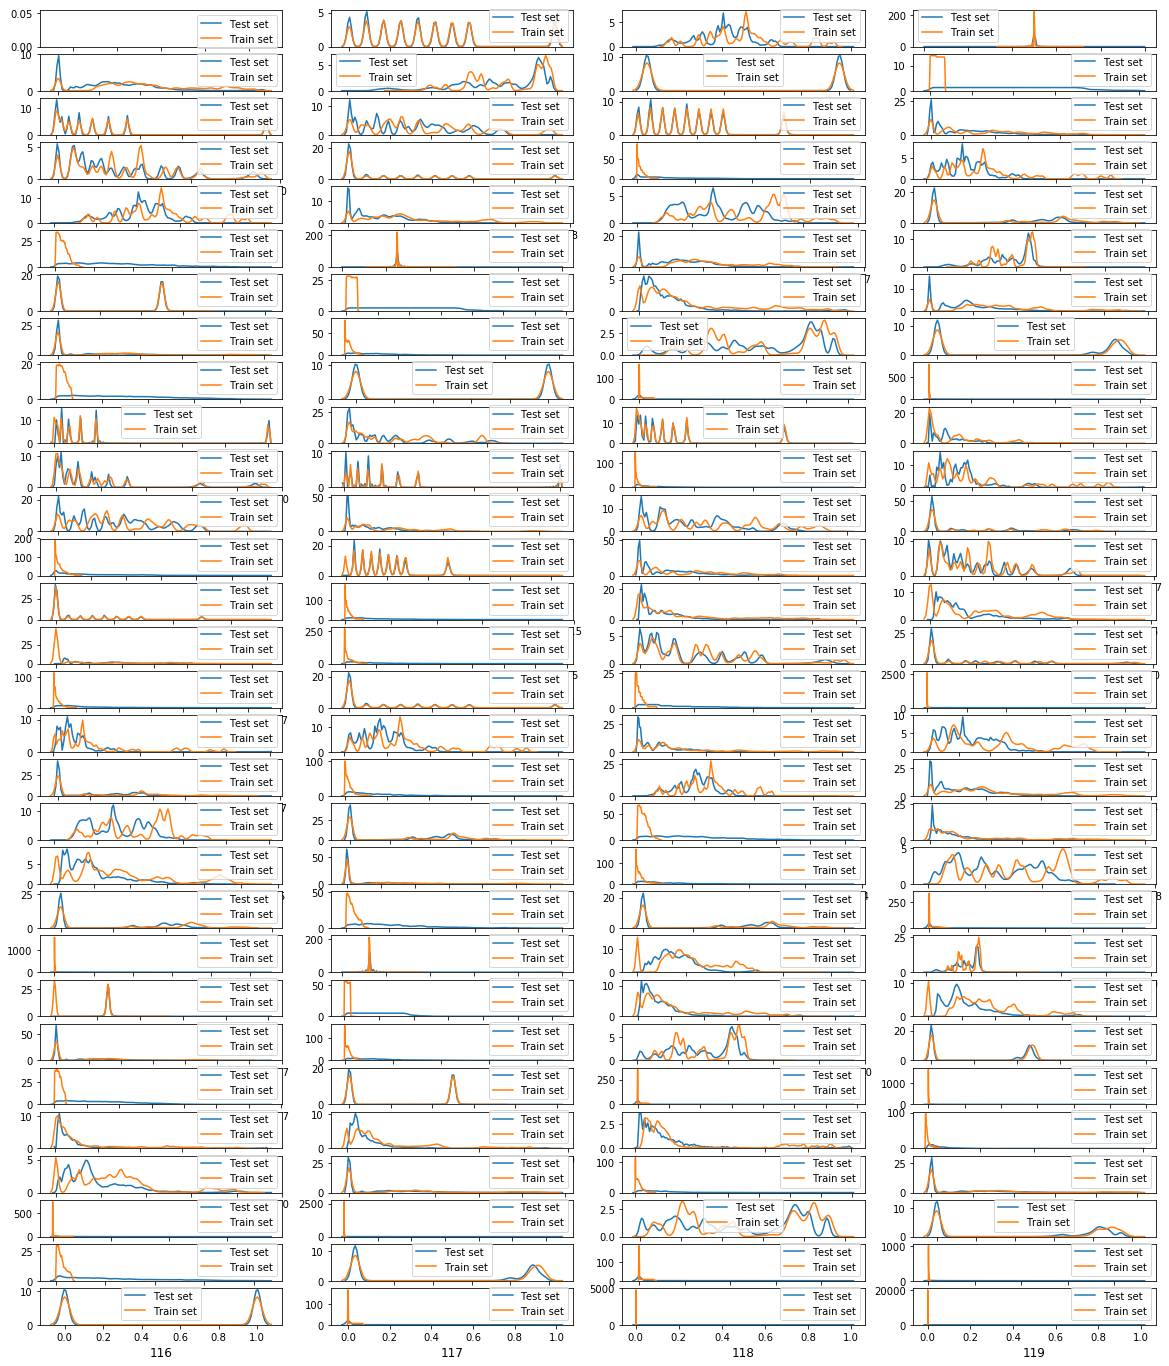

In [22]:
plt.figure(figsize=(20,25))
plt.title('Eeg features distributions')
i = 0
for eeg in range(0,len(train[0])):
    i += 1
    plt.subplot(len(train[0])/4+1, 4, i)
    sns.distplot(test[:,eeg], label='Test set', hist=False)
    sns.distplot(train[:,eeg], label='Train set', hist=False)
    #plt.xlim((-500, 500))
    plt.legend()
    plt.xlabel(eeg, fontsize=12)

plt.show()

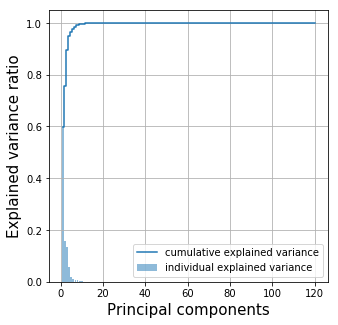

In [31]:
fig = plt.figure(figsize=(5,5))
cov_mat = np.cov(train.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,len(train[0])+1), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,len(train[0])+1), cum_var_exp, where='mid',label='cumulative explained variance')

plt.ylabel('Explained variance ratio',fontsize=15)
plt.xlabel('Principal components',fontsize=15)
plt.legend(loc='best')
plt.grid()
plt.show()

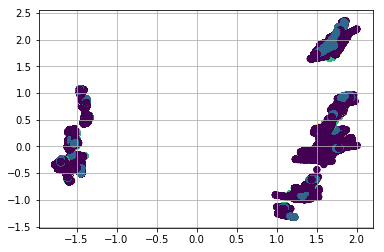

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
space2D = pca.fit_transform(train)
plt.scatter(space2D[:,0],space2D[:,1],c=labels)
plt.grid()